In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import re

In [3]:
import datetime

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from plotting import *

## Acquisition

In [12]:
# experiment_name = 'master'

# n=4
# g=1

# log_file_name = experiment_name+'-n'+str(n)+'-g'+str(g)

In [13]:
log_file_name='master_sync_mini_100.log'

#### Load info from loss lines

In [14]:
all_lines=load_results(log_file_name)

#### Time, Worker id, Iteration Number, Loss

In [15]:
all_lines[:10]

[[datetime.datetime(1900, 1, 1, 14, 1, 25, 46299), 0, 1, 2.30263],
 [datetime.datetime(1900, 1, 1, 14, 1, 25, 59515), 2, 1, 2.30249],
 [datetime.datetime(1900, 1, 1, 14, 1, 25, 72656), 3, 1, 2.30257],
 [datetime.datetime(1900, 1, 1, 14, 1, 25, 90818), 1, 1, 2.30274],
 [datetime.datetime(1900, 1, 1, 14, 1, 25, 196111), 1, 2, 2.30264],
 [datetime.datetime(1900, 1, 1, 14, 1, 25, 222105), 0, 2, 2.30254],
 [datetime.datetime(1900, 1, 1, 14, 1, 25, 222800), 2, 2, 2.30258],
 [datetime.datetime(1900, 1, 1, 14, 1, 25, 223631), 3, 2, 2.30238],
 [datetime.datetime(1900, 1, 1, 14, 1, 25, 326038), 0, 3, 2.30243],
 [datetime.datetime(1900, 1, 1, 14, 1, 25, 326696), 2, 3, 2.30289]]

#### Extract  losses and times vectors

In [16]:
# all_seconds, all_losses = get_times_losses(all_lines)

# all_seconds2, all_losses2 = get_times_losses(all_lines)

# all_seconds_master, all_losses_master = get_times_losses(all_lines)

In [17]:
def plot_smoothed_loss(log_file_name,offset=0.0):
    all_lines=load_results(log_file_name)
    all_seconds, all_losses = get_times_losses(all_lines)
    plt.plot(moving_average(all_losses,window_size=100)+offset,'-',linewidth=3)
    

In [18]:
def compare_smoothed_loss(log_file_name):
    all_lines=load_results(log_file_name)
    all_seconds, all_losses = get_times_losses(all_lines)
    print all_losses[100:106]
    

In [156]:
compare_smoothed_loss('master-n4-g1')
compare_smoothed_loss('master-new-n4-g1')
compare_smoothed_loss('master_sync_mini_100.log')


[2.28549, 2.30467, 2.2995, 2.29151, 2.29486, 2.28999]
[2.29151, 2.30467, 2.28549, 2.2995, 2.28838, 2.28999]
[2.28549, 2.30467, 2.29151, 2.2995, 2.30146, 2.28999]


In [19]:
compare_smoothed_loss('async-n4-g1')
compare_smoothed_loss('new-n4-g1')

[2.23064, 2.27342, 2.22025, 2.15308, 2.32359, 2.13432]
[2.22797, 2.1475, 2.21151, 2.27288, 2.12102, 2.32363]


[0, 2000, None, None]

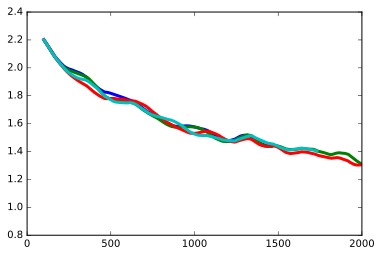

In [20]:
plot_smoothed_loss('async-n4-g1')
plot_smoothed_loss('new-n4-g1')
plot_smoothed_loss('jian_async_test.log')
plot_smoothed_loss('jian_async_new_parent_func.log')

plt.axis([0, 2000, None, None])
#plot_smoothed_loss('new-n4-g1')

[0, 2000, None, None]

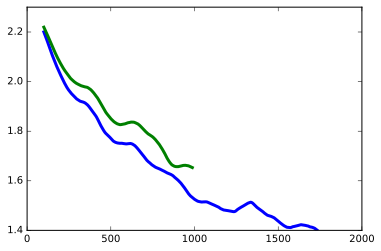

In [169]:
#plot_smoothed_loss('jian_async_test.log')
plot_smoothed_loss('jian_async_new_parent_func.log')
plot_smoothed_loss('master-new-lr-n4-g1')
plt.axis([0, 2000, None, None])
#plot_smoothed_loss('new-n4-g1')

[0, 2000, None, None]

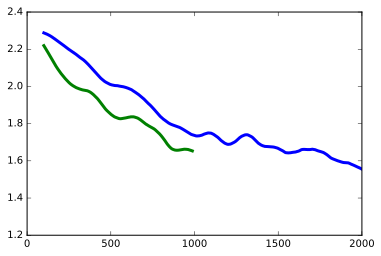

In [170]:
plot_smoothed_loss('master-n4-g1')
plot_smoothed_loss('master-new-lr-n4-g1')
plt.axis([0, 2000, None, None])
#plot_smoothed_loss('new-n4-g1')

[0, 10000, None, None]

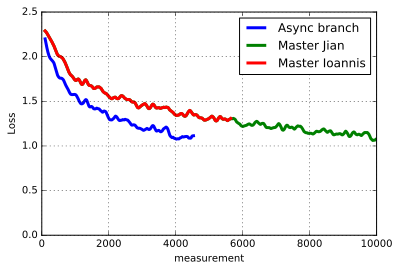

In [124]:
plt.plot(moving_average(all_losses2,window_size=100),'-',linewidth=3)
plt.plot(moving_average(all_losses,window_size=100),'-',linewidth=3)
plt.plot(moving_average(all_losses_master,window_size=100),'-',linewidth=3)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('measurement')
plt.legend(['Async branch', 'Master Jian', 'Master Ioannis'])
plt.axis([0,10000,None,None])

[0, 20000, None, None]

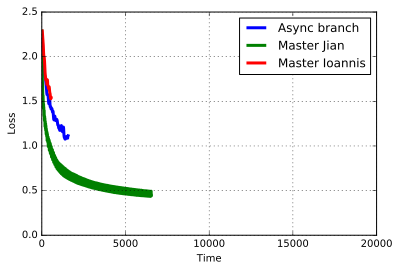

In [112]:
plt.plot(all_seconds2, moving_average(all_losses2,window_size=100),'-',linewidth=3)
plt.plot(all_seconds, moving_average(all_losses,window_size=100),'-',linewidth=3)
plt.plot(all_seconds_master, moving_average(all_losses_master,window_size=100),'-',linewidth=3)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Time')
plt.legend(['Async branch', 'Master Jian', 'Master Ioannis'])
plt.axis([0,20000,None,None])

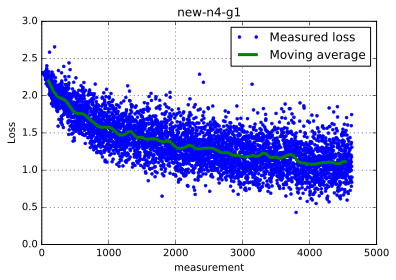

In [77]:
plt.plot(all_losses,'.', alpha=0.1)
plt.plot(moving_average(all_losses,window_size=100),'-',linewidth=3)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('measurement')
plt.legend(['Measured loss', 'Moving average'])
plt.title(log_file_name)

In [ ]:
plt.plot(all_losses,'.', alpha=0.1)
plt.plot(moving_average(all_losses,window_size=100),'-',linewidth=3)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('measurement')
plt.legend(['Measured loss', 'Moving average'])
plt.title(log_file_name)

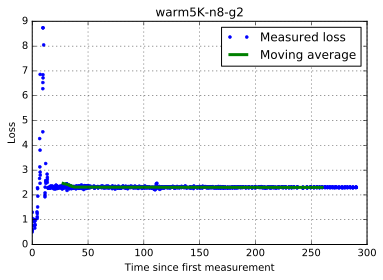

In [43]:
plt.plot(all_seconds,all_losses,'.', alpha=0.1)
plt.plot(all_seconds,moving_average(all_losses,window_size=100),'-',linewidth=3)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Time since first measurement')
plt.legend(['Measured loss', 'Moving average'])
plt.title(log_file_name)

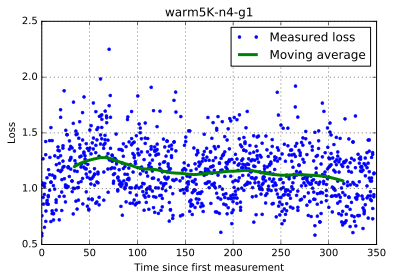

In [35]:
plt.plot(all_seconds,all_losses,'.', alpha=0.1)
plt.plot(all_seconds,moving_average(all_losses,window_size=100),'-',linewidth=3)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Time since first measurement')
plt.legend(['Measured loss', 'Moving average'])
plt.title(log_file_name)

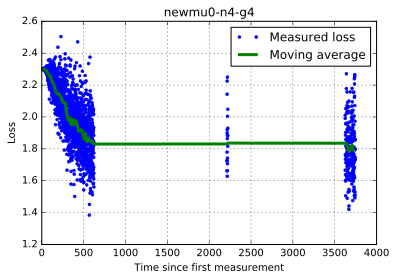

In [13]:
plt.plot(all_seconds,all_losses,'.', alpha=0.1)
plt.plot(all_seconds,moving_average(all_losses,window_size=50),'-',linewidth=3)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Time since first measurement')
plt.legend(['Measured loss', 'Moving average'])
plt.title(log_file_name)

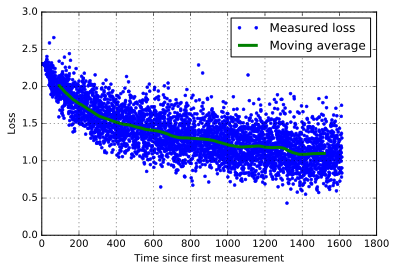

In [435]:
plt.plot(all_seconds,all_losses,'.', alpha=0.1)
plt.plot(all_seconds,moving_average(all_losses,window_size=250),'-',linewidth=3)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Time since first measurement')
plt.legend(['Measured loss', 'Moving average'])
plt.title(log_file_name)

In [405]:
all_lines[-5][2]

386

### 4 nodes, 4 groups

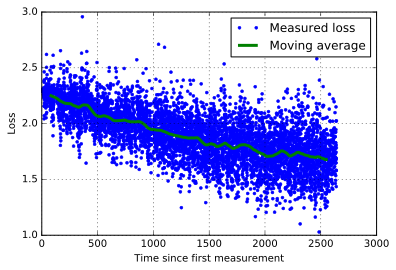

In [418]:
plt.plot(all_seconds,all_losses,'.', alpha=0.2)
plt.plot(all_seconds,moving_average(all_losses,window_size=200),'-',linewidth=3)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Time since first measurement')
plt.legend(['Measured loss', 'Moving average'])

### 4 nodes, 2 groups 

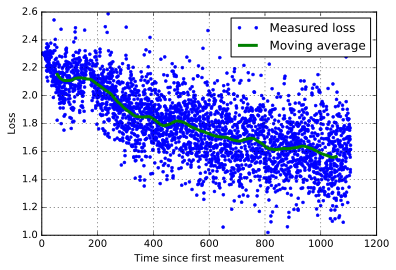

In [338]:
plt.plot(all_seconds,all_losses,'.', alpha=0.2)
plt.plot(all_seconds,moving_average(all_losses,window_size=150),'-',linewidth=3)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Time since first measurement')
plt.legend(['Measured loss', 'Moving average'])

In [357]:
all_lines = []

with open(log_file_name, "r") as f:
    for line in f.readlines():
        if re.match('(.*)solver\.cpp(.*)Iteration(.*)loss(.*)', line):
            #print line
            (
             _,time_field,pid,source_line,worker_id,check_iteration,
             niter,check_loss,check_equals,loss
            ) =line.split()
            assert(check_iteration=="Iteration")
            assert(check_loss=="loss")
            assert(check_equals=='=')
            loss=float(loss)
            niter=int(niter[:-1])
            worker_id = int(worker_id[1:-1])
            dt = datetime.datetime.strptime(time_field, "%H:%M:%S.%f")
            #print time, ' Worker=', worker_id, ' Iteration=', niter, ' Loss=',loss
            new_line = [dt, worker_id, niter, loss]
            all_lines.append(new_line)

In [359]:
all_losses = [line[3] for line in all_lines]

In [360]:
all_losses[:5]

[2.30257, 2.30274, 2.30249, 2.3027, 2.30206]

In [361]:
dt0 = all_lines[0][0]

In [362]:
all_seconds = [(line[0]-dt0).total_seconds() for line in all_lines]

In [363]:
all_seconds[:5]

[0.0, 0.008021, 0.116582, 0.123886, 1.537748]